### 题目描述
给你一个单链表的头节点 head，请你判断该链表是否为回文链表。如果是，返回 true；否则，返回 false。

什么是回文链表？

回文是指正着读和反着读都一样的序列。

回文链表就是链表中的**节点值**从前往后读和从后往前读是完全相同的。

回文示例：

- ✅ [1, 2, 2, 1] - 正读：1221，反读：1221，相同，是回文

- ✅ [1, 2, 3, 2, 1] - 正读：12321，反读：12321，相同，是回文

- ✅ [1] - 单个元素，是回文

- ✅ [1, 1] - 正读：11，反读：11，是回文

- ❌ [1, 2] - 正读：12，反读：21，不同，不是回文

- ❌ [1, 2, 3] - 正读：123，反读：321，不同，不是回文


简单理解：链表的值序列是对称

### 解题思路
核心算法逻辑：

- 使用快慢指针找到链表中点

- 反转后半部分链表

- 比较前半部分和反转后的后半部分

（可选）恢复链表结构

- 时间复杂度： O(n)

- 空间复杂度： O(1)

关键点和易错点

关键点：

- 快慢指针定位中点：快指针走两步，慢指针走一步，当快指针到达末尾时，慢指针正好在中点

- 链表长度的奇偶性：奇数长度时中间节点只有一个，偶数长度时有两个中间节点

- 反转链表：需要熟练掌握链表反转的写法（三指针法）

易错点：

- 边界条件：空链表或只有一个节点的链表要特殊处理

- 中点选择：奇数长度链表时，中间节点可以跳过不比较

- 指针移动顺序：反转链表时要注意先保存 next，避免断链

- 比较时的终止条件：后半部分遍历完即可（因为后半部分可能比前半部分短）

### Note:
#### 快慢指针找中点的原理核心思想

慢指针（slow）：每次走 1 步

快指针（fast）：每次走 2 步

当快指针到达链表末尾时，慢指针刚好在中点位置

为什么这样可以找到中点？想象一个赛跑：

A 选手速度是 1m/s（慢指针）

B 选手速度是 2m/s（快指针）

当 B 跑到终点时，A 刚好跑到一半的位置


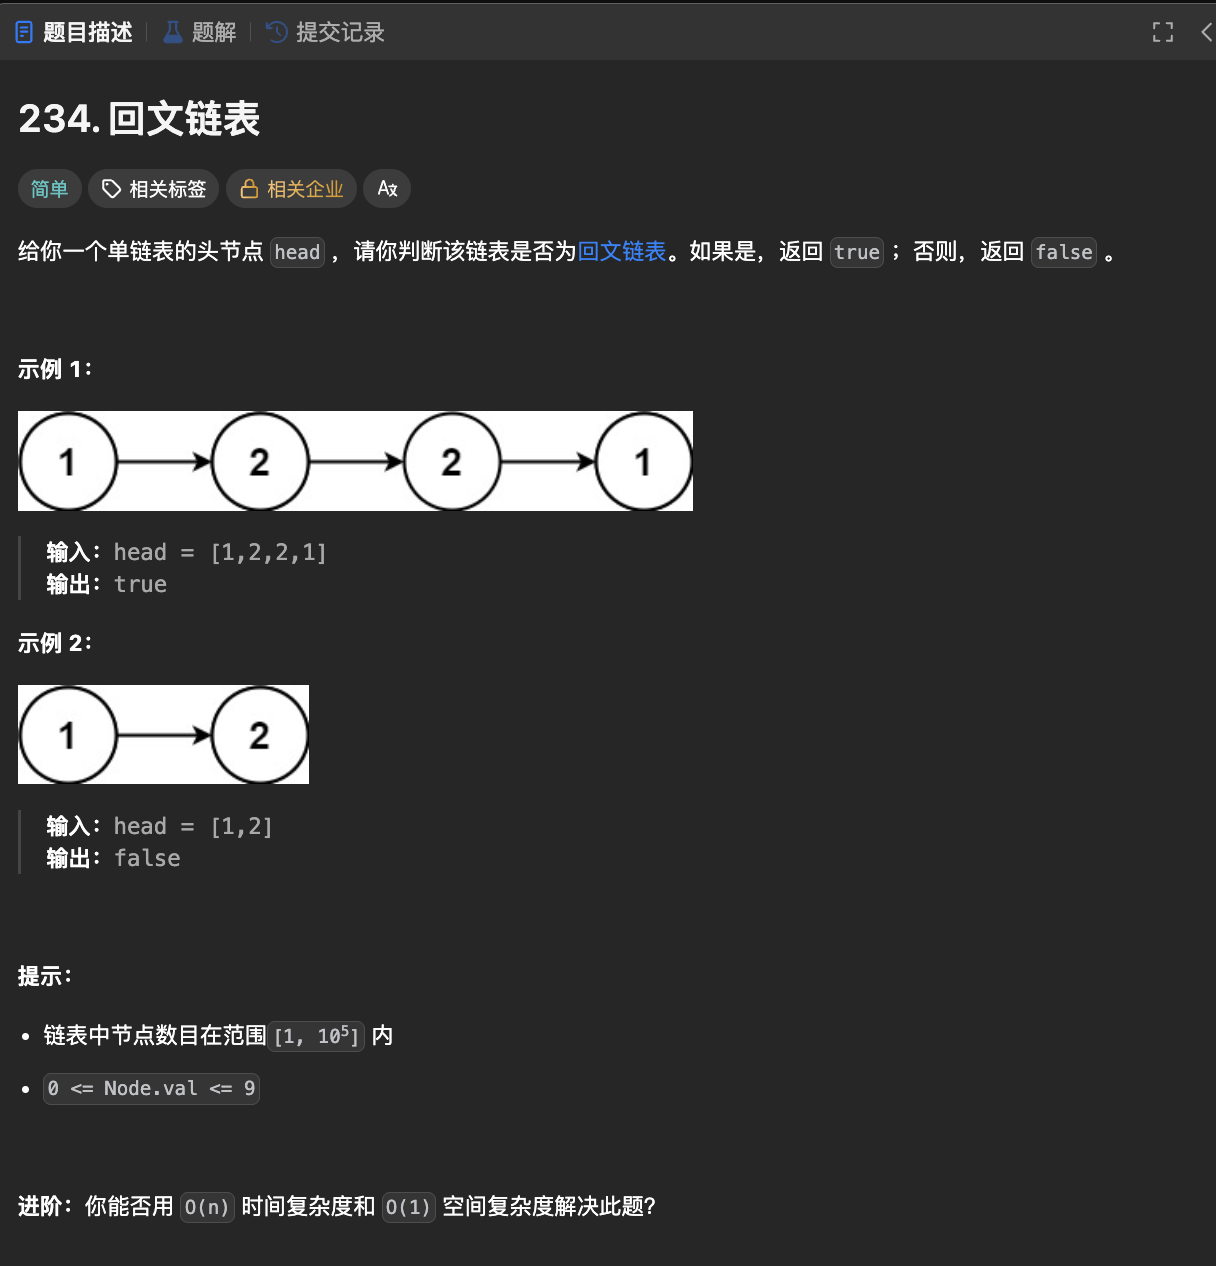

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def isPalindrome(self, head: ListNode) -> bool:
        if not head or not head.next:
            return True
        
        # 1. 使用快慢指针找到中点
        # **快指针每次走2步，慢指针每次走1步，当快指针到达链表末尾时，慢指针恰好走到链表中点位置。**
        slow = fast = head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # 执行完上面这段代码后慢在链表中部，奇数的好理解，偶数的例子如下
        # 偶数长度：[1, 2, 2, 1]
        # 初始: slow和fast都在1
        # 第1步: slow到2，fast到3（跳过2）
        # 第2步: slow到2，fast到None（跳过4后到末尾）
        # 结果: slow在2（第二个2）
        
        # 2. 反转后半部分链表
        # slow 现在指向后半部分的起点
        prev = None
        curr = slow
        while curr:
            next_temp = curr.next  # 保存下一个节点
            curr.next = prev       # 反转指针
            prev = curr            # prev 前进
            curr = next_temp       # curr 前进
        
        # 3. 比较前半部分和反转后的后半部分
        # prev 现在是反转后的后半部分的头节点
        left = head
        right = prev
        while right:  # 只需要遍历后半部分
            if left.val != right.val:
                return False
            left = left.next
            right = right.next
        
        return True


if __name__ == '__main__':
    # 辅助函数：创建链表
    def create_linked_list(arr):
        if not arr:
            return None
        head = ListNode(arr[0])
        curr = head
        for val in arr[1:]:
            curr.next = ListNode(val)
            curr = curr.next
        return head
    
    # 辅助函数：打印链表
    def print_linked_list(head):
        vals = []
        while head:
            vals.append(head.val)
            head = head.next
        print(vals)
    
    solution = Solution()
    
    # 测试用例1: [1,2,2,1] - 回文
    head1 = create_linked_list([1, 2, 2, 1])
    print("测试用例1: [1,2,2,1]")
    print(f"是否为回文: {solution.isPalindrome(head1)}")  # True
    print()
    
    # 测试用例2: [1,2] - 非回文
    head2 = create_linked_list([1, 2])
    print("测试用例2: [1,2]")
    print(f"是否为回文: {solution.isPalindrome(head2)}")  # False
    print()
    
    # 测试用例3: [1,2,3,2,1] - 回文（奇数长度）
    head3 = create_linked_list([1, 2, 3, 2, 1])
    print("测试用例3: [1,2,3,2,1]")
    print(f"是否为回文: {solution.isPalindrome(head3)}")  # True
    print()
    
    # 测试用例4: [1] - 单节点
    head4 = create_linked_list([1])
    print("测试用例4: [1]")
    print(f"是否为回文: {solution.isPalindrome(head4)}")  # True
    print()
    
    # 测试用例5: [1,1,2,1] - 非回文
    head5 = create_linked_list([1, 1, 2, 1])
    print("测试用例5: [1,1,2,1]")
    print(f"是否为回文: {solution.isPalindrome(head5)}")  # False




测试用例1: [1,2,2,1]
是否为回文: True

测试用例2: [1,2]
是否为回文: False

测试用例3: [1,2,3,2,1]
是否为回文: True

测试用例4: [1]
是否为回文: True

测试用例5: [1,1,2,1]
是否为回文: False
